<a href="https://www.kaggle.com/code/timurtalikbayev/kaggle-house-prices-basics-v-2?scriptVersionId=110489953" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# House Prices prediction

In this notebook I'll try to predict price of the houses using machine learning techniques

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


<a id="description"></a>
# Data description

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

# Import libraries 

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Datasets preparation

In [3]:
# Load train dataframe
train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
print(train.shape)

(1460, 81)


In [4]:
# Load train dataframe
test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


As I want to prepare all the data to future exploration and analysis I'll join two dataframes and split them after preparation. So, I need to remember that test dataframe has ids 1461 and above and has no 'SalePrice' column.

In [5]:
# Add 'SalePrice' column with 0 values
test['SalePrice'] = 0

# Check for df's shape
test.shape

(1459, 81)

In [6]:
# Append train df with test df
df = train.append(test)

# Check for df's shape
df.shape

(2919, 81)

Now we have common dataframe to work with. Let's continue

Explore dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

So, now we know that there are different data types and null values in our dataframe. First we need to get rid of null data. For this purposes check for the columns with null values.

In [8]:
# Create function
def where_is_null_values(df):
    
    # Create temporary series with number of null data cells
    temp_df = df.isna().sum()

    # Filter that series and get column's names with number of null cells
    temp_df = temp_df[temp_df > 0]
    
    return temp_df.sort_values(ascending=False)

# Launch our function
where_is_null_values(df)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

Now we have to examine each column and deside what to do with missing data.
<br>First explore PoolQC

In [9]:
# Get unique values from PoolQC column
print(df['PoolQC'].unique())

[nan 'Ex' 'Fa' 'Gd']


Here we can see that we have 3 unique values and nan values.<br>
Go to data description and read 
> PoolQC: Pool quality
> 
>    Ex   Excellent<br>
>    Gd   Good<br>
>    TA   Average/Typical<br>
>    Fa   Fair<br>
>    NA   No Pool 

Now we understand that we need to replace Nan values with No Pool. <br>
And we can do the same with 
<br>Fence - No Fence, 
<br>MiscFeature - None, 
<br>GarageFinish - No Garage
<br>GarageQual - No Garage
<br>GarageCond - No Garage
<br>GarageYrBlt  - No Garage
<br>GarageType - No Garage
<br>BsmtExposure - No Basement
<br>BsmtCond - No Basement
<br>BsmtQual - No Basement
<br>BsmtFinType2 - No Basement
<br>BsmtFinType1 - No Basement
<br>FireplaceQu - No Fireplace
<br>Alley - No alley access
<br>MasVnrType - None 

In [10]:
# Replace those null data 
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['Fence'] = df['Fence'].fillna('No Fence') 
df['MiscFeature'] = df['MiscFeature'].fillna('None') 
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage') 
df['GarageQual'] = df['GarageQual'].fillna('No Garage') 
df['GarageCond'] = df['GarageCond'].fillna('No Garage') 
df['GarageYrBlt'] = df['GarageYrBlt'].fillna('No Garage') 
df['GarageType'] = df['GarageType'].fillna('No Garage') 
df['BsmtExposure'] = df['BsmtExposure'].fillna('No') 
df['BsmtCond'] = df['BsmtCond'].fillna('No')
df['BsmtQual'] = df['BsmtQual'].fillna('No')
df['BsmtFinType2'] = df['BsmtExposure'].fillna('No')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df['Alley'] = df['Alley'].fillna('No alley access')
df['MasVnrType'] = df['MasVnrType'].fillna('None')

# Check for null values
where_is_null_values(df)

LotFrontage     486
MasVnrArea       23
MSZoning          4
BsmtFullBath      2
Utilities         2
Functional        2
BsmtHalfBath      2
GarageArea        1
GarageCars        1
KitchenQual       1
TotalBsmtSF       1
Electrical        1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
SaleType          1
dtype: int64

LotFrontage column has numeric values. I'll replace missing values by median LotFrontage of neighborgood houses.

In [11]:
# Replace missing values
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# Check for null values
where_is_null_values(df)

MasVnrArea      23
MSZoning         4
BsmtFullBath     2
Functional       2
BsmtHalfBath     2
Utilities        2
GarageArea       1
GarageCars       1
KitchenQual      1
TotalBsmtSF      1
Electrical       1
BsmtUnfSF        1
BsmtFinSF2       1
BsmtFinSF1       1
Exterior2nd      1
Exterior1st      1
SaleType         1
dtype: int64

Much better. Now let's take a look 

In [12]:
# Items that have ['GarageArea'] is nan
df[df['GarageArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1116,2577,70,RM,50.0,9060,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,MnPrv,None,0,3,2007,WD,Alloca,0


As we can see the is no garage, so we can fill in Nan values with zero. The same operation with GarageCars

In [13]:
# Replace missed values with 0
df['GarageArea'] = df['GarageArea'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)

# Check for null values
where_is_null_values(df)

MasVnrArea      23
MSZoning         4
Utilities        2
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
Exterior1st      1
Exterior2nd      1
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Electrical       1
KitchenQual      1
SaleType         1
dtype: int64

What about MasVnrArea? 

In [14]:
# Items that have ['MasVnrArea'] is nan
df[df['MasVnrArea'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,64.0,7851,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2010,WD,Normal,216500
529,530,20,RL,70.0,32668,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,3,2008,WD,Normal,237000
231,1692,60,RL,64.0,12891,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,7,2009,WD,Normal,0
246,1707,20,FV,90.0,7993,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,10,2009,New,Partial,0


Here we can see that items that have MasVnrArea is Nan also have MasVnrTyme None. So we can replace missing values with zero.

In [15]:
# Replace missed values with 0
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# Check for null values
where_is_null_values(df)

MSZoning        4
Utilities       2
BsmtFullBath    2
BsmtHalfBath    2
Functional      2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
Electrical      1
KitchenQual     1
SaleType        1
dtype: int64

What about Bsmt's. Lets compouse dataframe with BsmtFullBath is nan

In [16]:
# Show rows where BsmtFullBath has Nan value
df[df['BsmtFullBath'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
660,2121,20,RM,99.0,5940,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,MnPrv,None,0,4,2008,ConLD,Abnorml,0
728,2189,20,RL,123.0,47007,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,7,2008,WD,Normal,0


As we can see there is no basement in other columns (BsmtQual	BsmtCond	BsmtExposure etc.)

In [17]:
# Replace those NaNs by zero
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)


# Check for null values
where_is_null_values(df)

MSZoning       4
Utilities      2
Functional     2
Exterior1st    1
Exterior2nd    1
Electrical     1
KitchenQual    1
SaleType       1
dtype: int64

For other values I'll replace it with most frequent value

In [18]:
# Check for most frequent value (repeat for other)
df['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [19]:
# Replace nan in object and categorical columns
df['KitchenQual'] = df['KitchenQual'].transform(lambda x: x.fillna("TA"))
df['Exterior1st'] = df['Exterior1st'].transform(lambda x: x.fillna("VinylSd"))
df['Exterior2nd'] = df['Exterior2nd'].transform(lambda x: x.fillna("VinylSd"))
df['SaleType'] = df['SaleType'].transform(lambda x: x.fillna("WD"))
df['Functional'] = df['Functional'].transform(lambda x: x.fillna("Typ"))
df['Electrical'] = df['Electrical'].transform(lambda x: x.fillna("SBrkr"))
df['MSZoning'] = df['MSZoning'].transform(lambda x: x.fillna("RL"))
df['Utilities'] = df['Utilities'].transform(lambda x: x.fillna("NA"))

# Check for null values
where_is_null_values(df)

Series([], dtype: int64)

Now we have dataframe without NaN values. Let's return train and test df's again.

Now it's time to split df's

In [20]:
# Split df to train and test (as it was before joining). train df had 1460 rows and test 1459 rows
train = df.iloc[:1460,:]
test  = df.iloc[1460:, :]

# Drop SalePrice column
test.drop('SalePrice', axis=1, inplace=True)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,...,120,0,No Pool,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,No Pool,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,...,144,0,No Pool,No Fence,None,0,1,2010,WD,Normal


# Check for throwouts
We need to exclude throwouts from train dataframe. For this purposes get numeric columns and plot boxplots.

In [21]:
# Get all numeric columns names
numeric_columns = train.describe().columns

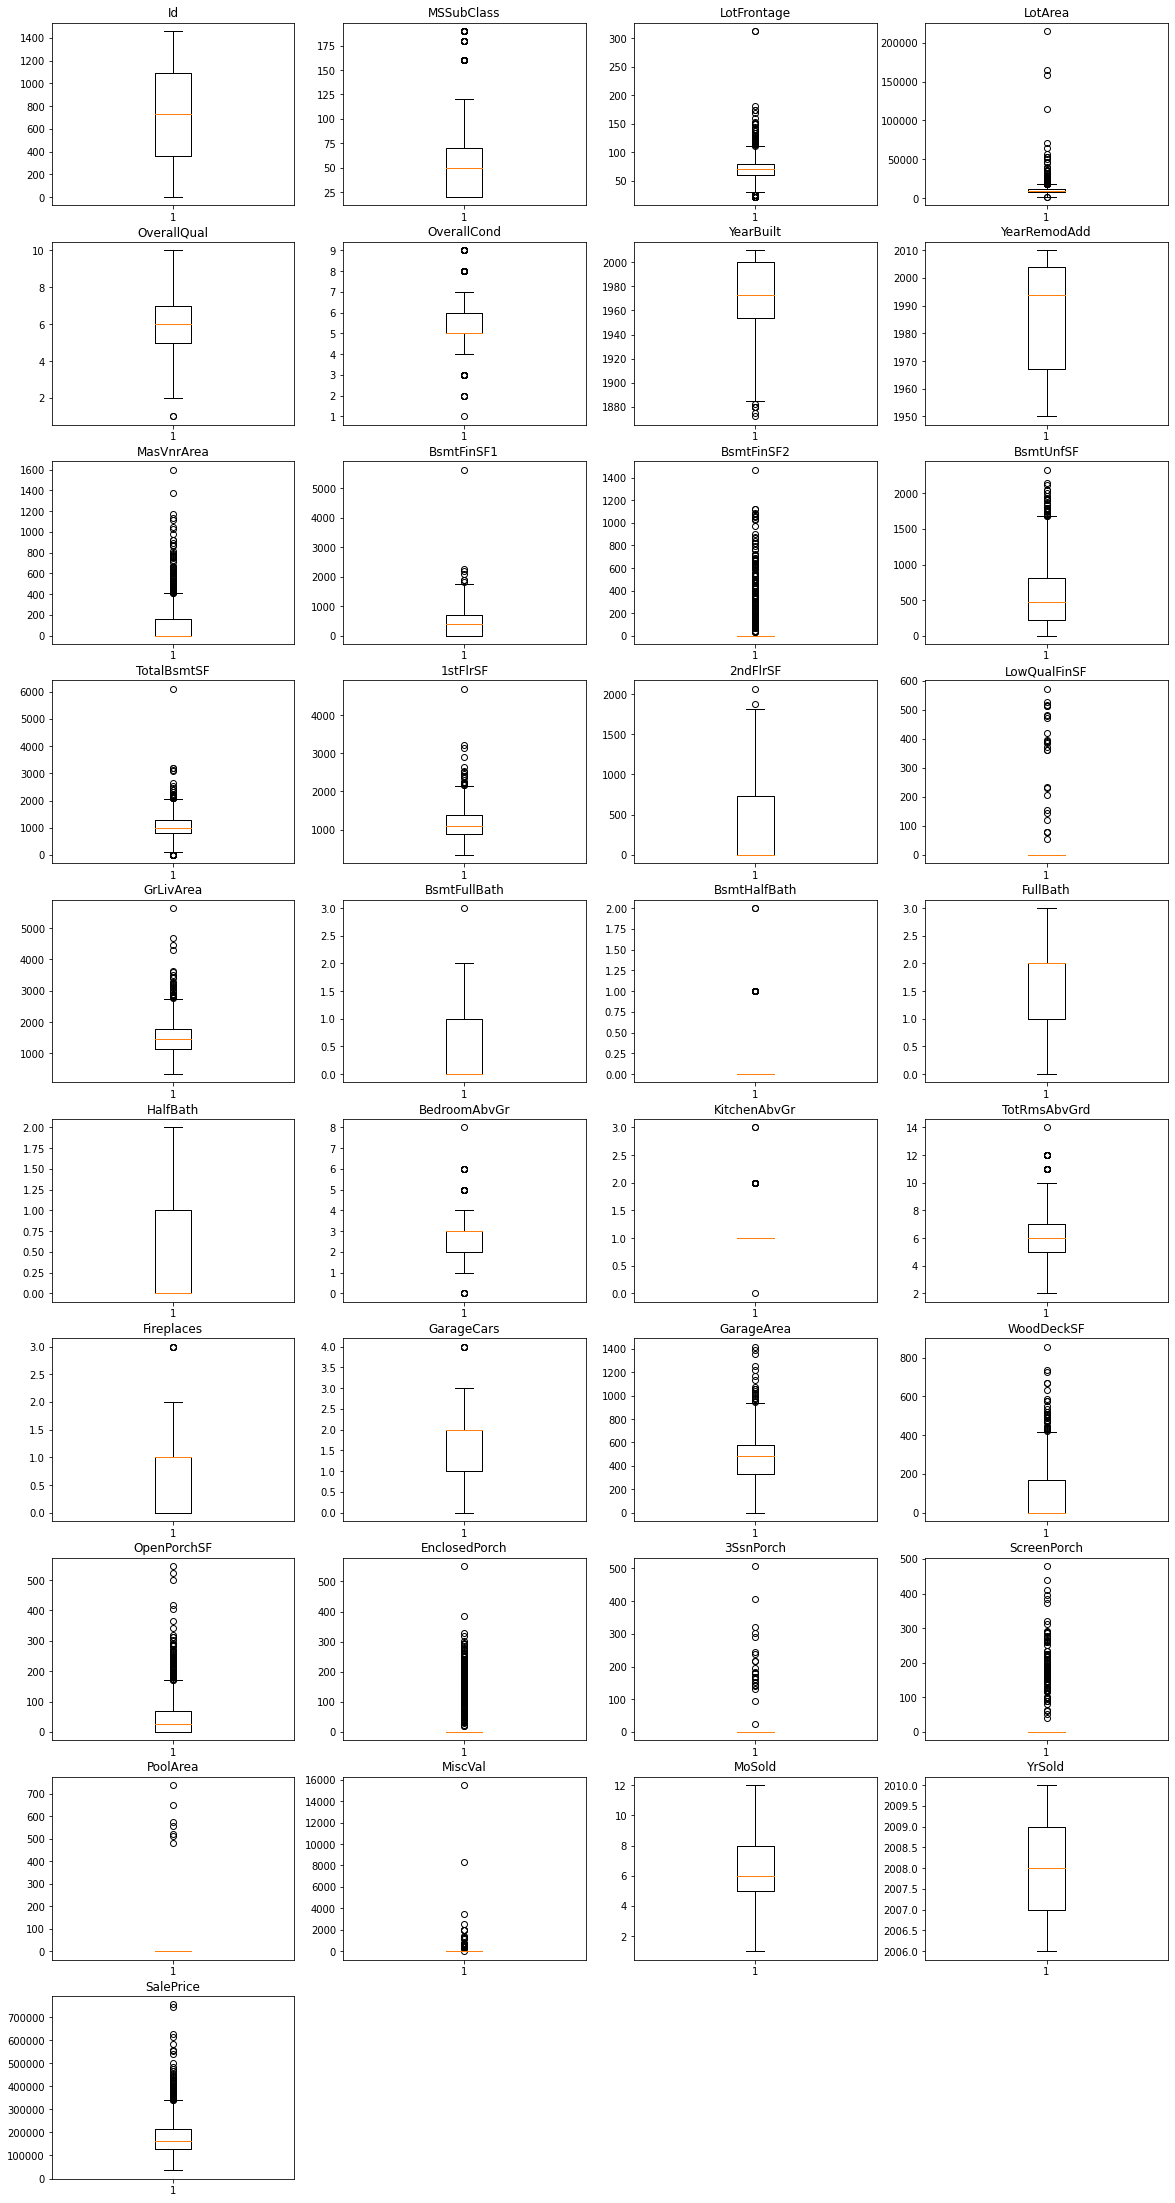

In [22]:
i=1
plt.figure(figsize=(20,80))
for column in numeric_columns:
    plt.subplot(20, 4, i)
    plt.boxplot(train[column])
    plt.title(column)
    i=i+1 
plt.show() 

Its time to remove data

In [23]:
# Remove rows with throwouts. Add or remove other columns to test how it works with final performance
train = train.drop(train[train['LotFrontage'] > 250].index)
# train = train.drop(train[train['MSSubClass'] > 150].index)
# train = train.drop(train[train['BsmtFinSF1'] > 4500].index)

train.shape

(1458, 81)

In [24]:
def get_dataframe_with_dummy_vars(df, list_of_columns):
    # Input Dataframe and List of the columns that needs to be turned 
    # into dummy variables and get new dataframe 
    
    # For each column in list
    for column in list_of_columns:
        
        # Get dummies dataframe
        dummy_var_df = pd.get_dummies(df[column])
        
        # Create dataframe with names of new columns
        dummy_df = pd.DataFrame(df[column].value_counts())
        dummy_df.reset_index(inplace=True)
        
        # For each name of the column 
        for index, value in enumerate(dummy_df['index']):
            
            # Get name of the var
            name = str(dummy_df.iloc[index,0])
            
            # Create new column name
            new_column_name = column + "_" + name 
            
            # Rename column
            dummy_var_df.rename(columns={name:new_column_name}, inplace=True)
        
        # Merge data frame "df" and "dummy df" 
        df = pd.concat([df, dummy_var_df], axis=1)

        # drop original column "fuel-type" from "df"
        df.drop(column, axis = 1, inplace=True)
        
    return(df)

In [25]:
# Append train df with test df
df = train.append(test)

# Check for df's shape
df.shape

(2917, 81)

In [26]:
# Get list of columns that are 'object' or 'category' data type
list_of_cols =  list(df.select_dtypes(['object', 'category']).columns)
print(list_of_cols)

#Get df with dummies
df_d = get_dataframe_with_dummy_vars(df, list_of_cols)
df_d.shape

train_df_lenth = len(train)

# Split df to train and test (as it was before joining). train df had 1460 rows and test 1459 rows
train = df_d.iloc[:train_df_lenth,:]
test  = df_d.iloc[train_df_lenth:, :]

# Drop SalePrice column
test.drop('SalePrice', axis=1, inplace=True)
test.head()

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


<a id="MLM"></a>
# Machine Learning

Define functions first

In [27]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y, predictions):
    "Function Counts evaluation errors"

    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

def run_ml_and_get_performance_results(models_list):
    # Create dataframe
    models = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score", "RMSE (Cross-Validation)"])
    # For each model in list
    for model in models_list:
        print("-"*30)
        str_model = str(model)
        print("Model ", str_model, " Started")
        
        # Check for Linear model
        if "Polynomial" in str_model:
            X_train_d = model.fit_transform(X_train)
            X_test_d = model.transform(X_test)

            lin_reg = LinearRegression()
            lin_reg.fit(X_train_d, y_train)
            predictions = lin_reg.predict(X_test_d)
            # Get coefficients
            mae, mse, rmse, r_squared = evaluation(y_test, predictions)       
            rmse_cross_val = rmse_cv(lin_reg)
            
        else: 
            # Fit model
            model.fit(X_train, y_train)
            # Get predictions on test data
            predictions = model.predict(X_test)
            # Get coefficients
            mae, mse, rmse, r_squared = evaluation(y_test, predictions)       
            rmse_cross_val = rmse_cv(model)
        
        print("MAE:", mae)
        print("MSE:", mse)
        print("RMSE:", rmse)
        print("R2 Score:", r_squared)
        print("-"*30)
        print("RMSE Cross-Validation:", rmse_cross_val)
        
        # Add new row to df
        new_row = {"Model": str_model[0:10],"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
        models = models.append(new_row, ignore_index=True)
    
    return models

In [28]:
# Set X and y 
y = train[['SalePrice']]
train.drop('SalePrice', axis=1, inplace=True)
X = train

In [29]:
X.dtypes.T

Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 402, dtype: object

In [30]:
# Import lib
from sklearn.preprocessing import StandardScaler

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.72964085,  0.07279605, -0.2355964 , ..., -0.11793306,
         0.46695301, -0.3048828 ],
       [-1.72726813, -0.872742  ,  0.49406349, ..., -0.11793306,
         0.46695301, -0.3048828 ],
       [-1.72489541,  0.07279605, -0.08966442, ..., -0.11793306,
         0.46695301, -0.3048828 ],
       ...,
       [ 1.72741134,  0.30918057, -0.18695241, ..., -0.11793306,
         0.46695301, -0.3048828 ],
       [ 1.72978406, -0.872742  , -0.08966442, ..., -0.11793306,
         0.46695301, -0.3048828 ],
       [ 1.73215678, -0.872742  ,  0.25084352, ..., -0.11793306,
         0.46695301, -0.3048828 ]])

In [31]:
# Import lib
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into train and test chunks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Import requred libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

# Create List for tests
models_list = [Ridge(), 
               Lasso(),
               ElasticNet(),
               SVR(C=100000),
               RandomForestRegressor(n_estimators=100),
               XGBRegressor(n_estimators=1000, learning_rate=0.01),
               PolynomialFeatures(degree=2)
               ]



In [33]:
# Uncomment this two lines to see resul of function's work

# results = run_ml_and_get_performance_results(models_list)
# results.sort_values(by="RMSE (Cross-Validation)")

# Price prediction
When we choosed the model, let's predict prices. Start from dataframe preparation

In [34]:
# Set X_test
X_train = X
X_test = test

X_test = scaler.fit_transform(X_test)
X_train = scaler.fit_transform(X_train)

In [35]:
# Set the model
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)

# Fit the model on all train data (before split, U can try to train it on X_train, y_train)
xgb.fit(X_train, y) 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [36]:
# Make prediction
predictions = xgb.predict(X_test).round()

# Export results
Submission = pd.DataFrame({ 'Id': test['Id'], 'SalePrice': predictions })

In [37]:
Submission.head()

,Id,SalePrice
0,1461,128552.0
1,1462,157319.0
2,1463,192200.0
3,1464,191158.0
4,1465,187674.0


In [38]:
#Export csv file
Submission.to_csv('submission.csv', index=False)